In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """


In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jabbarghassen","key":"427adebf16af6e0856ad6cebeaa06481"}'}

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/


In [6]:
!chmod 600 ~/.kaggle/kaggle.json 


In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:41<00:00, 19.0MB/s]
100% 2.70G/2.70G [00:41<00:00, 69.5MB/s]


In [8]:
!unzip new-plant-diseases-dataset.zip -d data1/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data1/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: data1/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: data1/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: data1/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: data1/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG 

In [9]:
from keras_preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions 


In [10]:
train_data = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, preprocessing_function=preprocess_input)
validation_data=ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
train=train_data.flow_from_directory(directory='/content/data1/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
target_size=(256,256),
batch_size=32)

val=train=validation_data.flow_from_directory(directory='/content/data1/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
target_size =(256,256),
batch_size =32)



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [12]:
t_img,label=train.next()

In [13]:
t_img.shape

(32, 256, 256, 3)

In [14]:
import matplotlib.pyplot as plt


In [15]:
def plotimage(img_arr , label):
  for im , l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


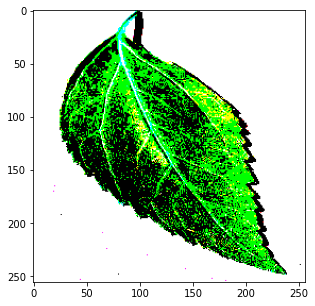

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


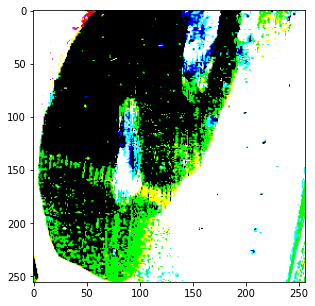

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


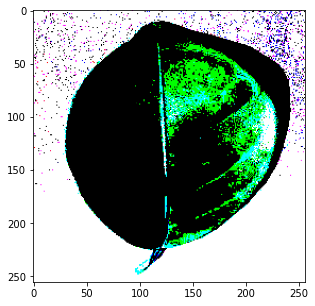

In [16]:
plotimage(t_img[:3], label[:3])

In [17]:
base_model=VGG19(input_shape=(256,256,3), include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [18]:
for layer in base_model.layers:
  layer.trainable=False

In [19]:
X=Flatten()(base_model.output)

In [20]:
X=Dense(units=38, activation='softmax')(X)

In [21]:
from keras.models import Model

In [22]:
model=Model(base_model.input, X)


In [23]:
import keras

In [24]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
es=EarlyStopping(monitor='val_accuracy',
                 min_delta=0.01,
                 patience=3,
                 verbose=1)

In [27]:
mc=ModelCheckpoint(filepath='base_model.h5',
                   monitor='val_acccuracy',
                   min_delta=0.01,
                   patience=3 , 
                   verbose=1, 
                   save_best_only=True)

In [28]:
cb=[es,mc]

In [29]:
hist=model.fit(train,steps_per_epoch=16,
                         epochs=50,
                         verbose=1,
                         callbacks=cb,
                         validation_data=val,
                         validation_steps=16)

Epoch 1/50
16/16 [==============================] - 54s 784ms/step - loss: 20.7746 - accuracy: 0.3145 - val_loss: 9.4857 - val_accuracy: 0.5254
Epoch 2/50
16/16 [==============================] - 12s 752ms/step - loss: 7.1405 - accuracy: 0.6367 - val_loss: 5.9374 - val_accuracy: 0.7266
Epoch 3/50
16/16 [==============================] - 12s 752ms/step - loss: 6.0340 - accuracy: 0.7207 - val_loss: 5.1847 - val_accuracy: 0.7812
Epoch 4/50
16/16 [==============================] - 12s 750ms/step - loss: 5.9147 - accuracy: 0.7539 - val_loss: 5.9571 - val_accuracy: 0.7500
Epoch 5/50
16/16 [==============================] - 12s 750ms/step - loss: 6.6383 - accuracy: 0.7324 - val_loss: 4.2242 - val_accuracy: 0.8145
Epoch 6/50
16/16 [==============================] - 12s 749ms/step - loss: 5.2420 - accuracy: 0.7793 - val_loss: 5.6209 - val_accuracy: 0.7832
Epoch 7/50
16/16 [==============================] - 12s 749ms/step - loss: 5.9757 - accuracy: 0.8105 - val_loss: 4.4607 - val_accuracy: 0.818

In [30]:
model.save('plantdiseasedetection.h5')


In [31]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

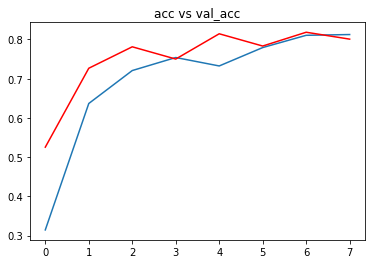

In [32]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c ="red")
plt.title('acc vs val_acc')
plt.show()


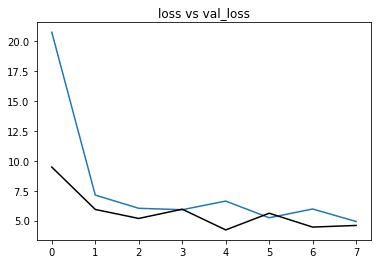

In [33]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c ="black")
plt.title('loss vs val_loss')
plt.show()

In [34]:
ref=dict (zip(list(train.class_indices.values()) , list(train.class_indices.keys())))

In [35]:
def predict(path):
  img=load_img(path, target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im, axis=0)
  pred=np.argmax(model.predict(img))
  plt.imshow(i)
  plt.show()
  print(f'the image is {ref[pred]}')

In [36]:
path='/content/data1/test/test/PotatoEarlyBlight2.JPG'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


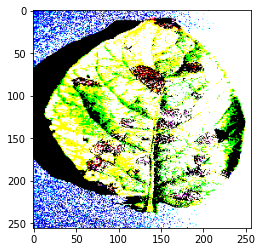

the image is Potato___Early_blight


In [37]:
predict('/content/data1/test/test/PotatoEarlyBlight2.JPG')

In [38]:
import pickle
pickle.dump(model,open('base_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://449941c5-55eb-4111-81f5-f8bc74b826a6/assets
